upload file

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
fil = files.upload()

Saving _Chores distribution and Sibling relationships - Form Responses 1 (1).csv to _Chores distribution and Sibling relationships - Form Responses 1 (1).csv


review data in file

In [ ]:
bob=pd.read_csv("_Chores distribution and Sibling relationships - Form Responses 1 (1).csv")
bob.head()

,Timestamp,Gender,Age,What's your position in the family?,Who does most of the chores at home? \nchores = home tasks,Do you think the chores are divided fairly?,How would you describe your relationship with your siblings?,How often do you talk to your siblings?,Do you think the tasks affect your relationship with your siblings?,How do you think the tasks influence your family's relationships?,How happy are you with your relationship with your siblings?
0,3/8/2024 17:50:35,Female,20,Youngest,"Parents, Me",No,Not very close,Every day,Yes,Sometimes cause problems,Neutral
1,3/8/2024 17:58:24,Female,20,Youngest,"Parents, Older brothers/sisters",No,Close,Every day,Yes,Sometimes cause problems,Happy
2,3/8/2024 18:01:55,Male,22,Oldest,We share equally,No,Not very close,Every day,No,No big impact,Happy
3,3/8/2024 18:16:28,Female,23,Middle,"Parents, Older brothers/sisters, Me",Yes,Supportive,Every day,Yes,Bring us closer,Happy
4,3/8/2024 18:48:20,Female,22,Middle,Parents,No,Close,Every day,No,Sometimes cause problems,Happy


mean , mode , median

In [ ]:
mean = bob.mean()
median = bob.median()
mode = bob.mode().iloc[0]  # choose the first one

print("\nMean:")
print(mean)
print("\nMedian:")
print(median)
print("\nMode:")
print(mode)


Mean:
Age    22.582278
dtype: float64

Median:
Age    22.0
dtype: float64

Mode:
Timestamp                                                                    3/10/2024 11:03:52
Gender                                                                                   Female
Age                                                                                        20.0
What's your position in the family?                                                      Middle
Who does most of the chores at home? \nchores = home tasks                              Parents
Do you think the chores are divided fairly?                                                  No
How would you describe your relationship with your siblings?                    Sometimes argue
How often do you talk to your siblings?                                               Every day
Do you think the tasks affect your relationship with your siblings?                         Yes
How do you think the tasks influence your family's rel

<ipython-input-22-c543db0d0260>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = bob.mean()
<ipython-input-22-c543db0d0260>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = bob.median()



The clustered bar chart above illustrates the relationship between an individual's position in the family and how they describe their relationship with their siblings. Each bar represents a different position in the family (e.g., "Parents", "Me", "Older sibling", "Younger sibling"), and within each bar, different colors represent the distribution of responses describing the relationship with siblings (e.g., "Close", "Not very close", "Supportive", "Sometimes argue").

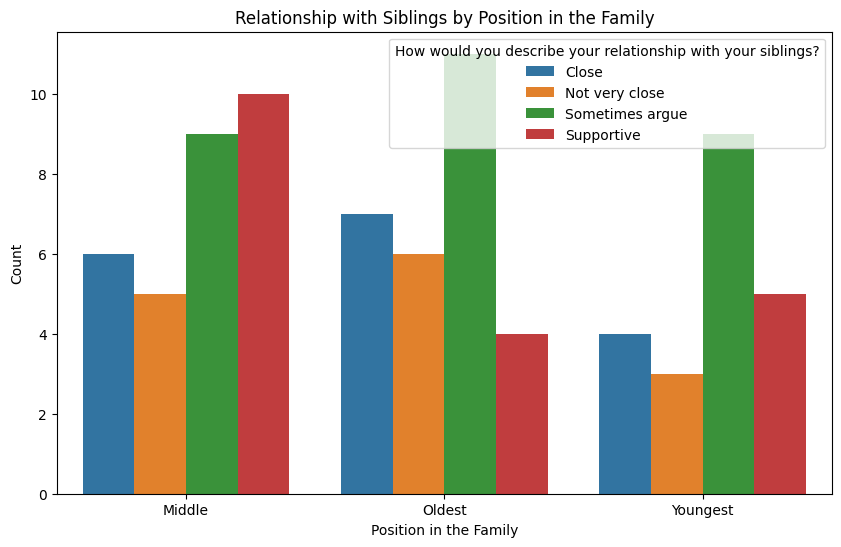

In [ ]:
grouped_data = bob.groupby(["What's your position in the family?", "How would you describe your relationship with your siblings?"]).size().reset_index(name="Count")

plt.figure(figsize=(10, 6))
sns.barplot(x="What's your position in the family?", y="Count", hue="How would you describe your relationship with your siblings?", data=grouped_data)
plt.title("Relationship with Siblings by Position in the Family")
plt.xlabel("Position in the Family")
plt.ylabel("Count")
plt.show()



 Each bar represents the count of responses for each category of who does most of the chores at home, and within each bar, different colors represent the distribution of responses regarding whether respondents think the chores are divided fairly.

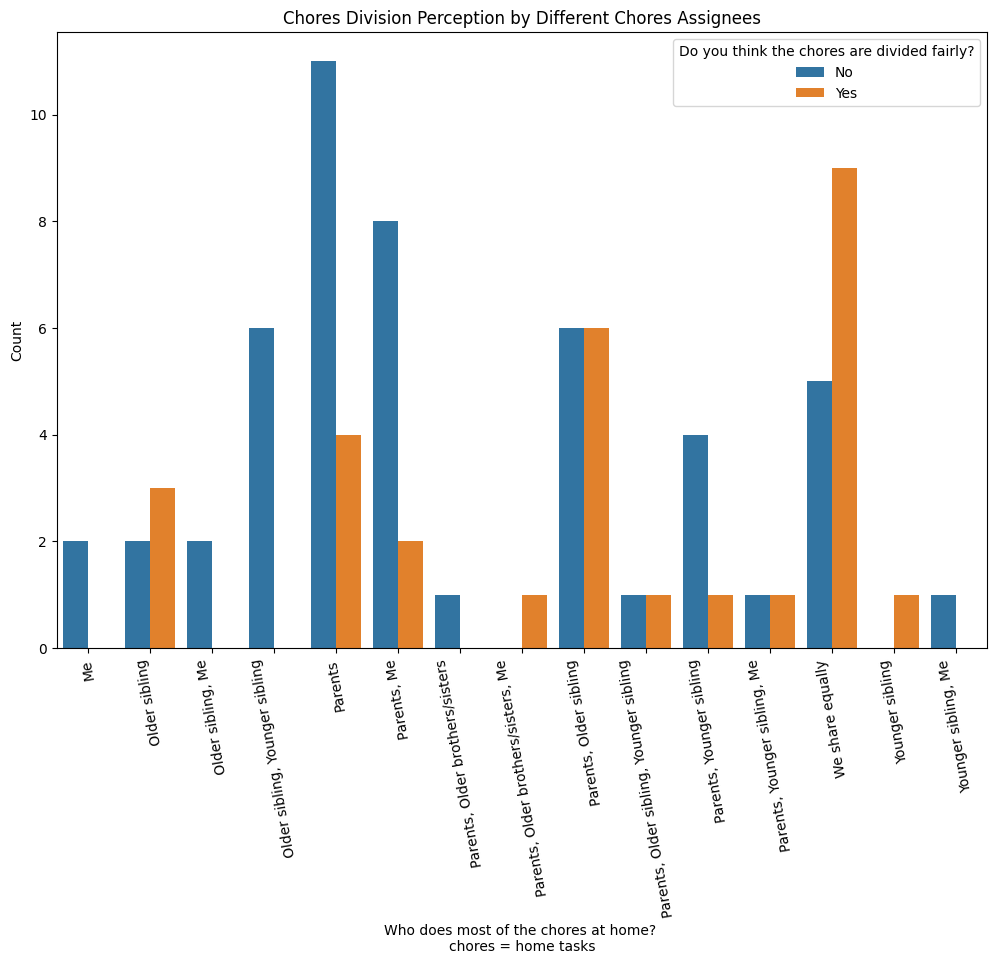

In [ ]:
grouped_data = bob.groupby(["Who does most of the chores at home? \nchores = home tasks", "Do you think the chores are divided fairly?"]).size().reset_index(name="Count")

plt.figure(figsize=(12, 8))
sns.barplot(x="Who does most of the chores at home? \nchores = home tasks", y="Count", hue="Do you think the chores are divided fairly?", data=grouped_data)
plt.title("Chores Division Perception by Different Chores Assignees")
plt.xlabel("Who does most of the chores at home? \nchores = home tasks")
plt.ylabel("Count")
plt.xticks(rotation=100)
plt.legend(title="Do you think the chores are divided fairly?")
plt.show()

the graph displays the average happiness levels with sibling relationships for each age group, making it easier to interpret the numerical values on the y-axis.

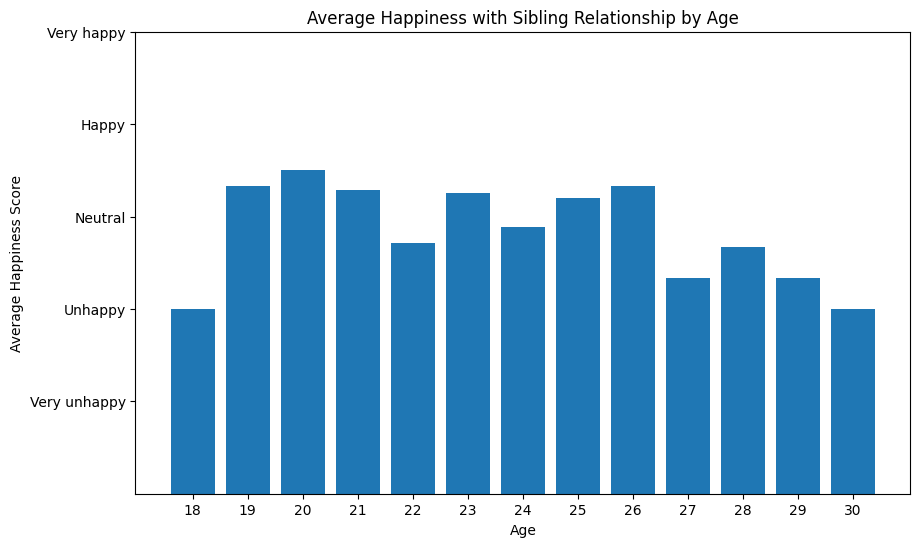

In [ ]:

happiness_mapping = {'Very unhappy': 1, 'Unhappy': 2, 'Neutral': 3, 'Happy': 4, 'Very happy': 5}
bob['Happiness Score'] = bob['How happy are you with your relationship with your siblings?'].map(happiness_mapping)

age_groups = bob.groupby('Age')['Happiness Score'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(age_groups['Age'], age_groups['Happiness Score'])
plt.xlabel('Age')
plt.ylabel('Average Happiness Score')
plt.title('Average Happiness with Sibling Relationship by Age')
plt.xticks(age_groups['Age'])
plt.yticks([1, 2, 3, 4, 5], ['Very unhappy', 'Unhappy', 'Neutral', 'Happy', 'Very happy'])
plt.show()

correlation

The Age variable has a very weak negative correlation with the Happiness Score.
The correlation suggests that, on average, as age increases, Happiness Score tends to slightly decrease, but the relationship is not strong.

In [ ]:
correlation_matrix = bob.corr()
print(correlation_matrix)


                      Age  Happiness Score
Age              1.000000        -0.144451
Happiness Score -0.144451         1.000000


<ipython-input-26-a8782d79edb3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = bob.corr()
